In [222]:
import numpy as np 
import networkx as nx 
from networkx import grid_graph
import matplotlib.pyplot as plt 
from random import sample

In [269]:
def init(N,k):
    G=nx.generators.lattice.grid_graph(dim=[int(np.sqrt(N)),int(np.sqrt(N))],periodic=True)
    pos=dict((n,n) for n in G.nodes())
    random_node=sample(list(G.nodes()),k)

    attrs={}

    for item in G.nodes():
        if item in random_node:
            attrs[item]='i'
        else:
            attrs[item]='s'
    for index,node in G.nodes():
        nx.set_node_attributes(G,attrs,"now")

    return G 
    #fig=plt.figure(figsize=(5,5))
    #nx.draw(G,pos=pos,node_size=75)

#for item in G.nodes:
    
    #if G.nodes[item]['now']=='i':
        #print(item)
        # 
def sir(N,k,time,r,p):
    G=init(N,k)
    i=[]
    i.append(random_node)

    S=np.zeros(time)
    I=np.zeros(time) 
    R=np.zeros(time)
    I[0]=k
    R[0]=0
    S[0]=N-I[0]-R[0]
    R_inf=[]
    for t in range(time):
        new_i=[]
        for node in i: 
            random=np.random.rand(4)
            affected=list(G.neighbors(node))
            for index,number in enumerate(random):
                if number<r and G.nodes[affected[index]]['now']=='s':
                    new_i.append(affected[index])
                    G.nodes[affected[index]]['tomorrow']='i'
    
        random=np.random.rand(len(i))
        cured=[]
        for index,number in enumerate(random):
            if number<r:
                G.nodes[i[index]]['tomorrow']='r'
                cured.append(i[index])
                R[t]+=1

    
        for item in new_i:
            G.nodes[item]['now']=G.nodes[item]['tomorrow']
     
        for item in cured:
            G.nodes[item]['now']=G.nodes[item]['tomorrow']
   
        i.extend(new_i)
        for item in cured:
            i.remove(item)
    
        I[t]=len(i)
        R[t]=R[t-1]+R[t]
        S[t]=N-I[t]-R[t]
        R_inf.append(R[-1])
    return S,I,R

N=256
k=1
time=200
p=0.35 
r=1
en_nubmer=2000
S,I,R=0,0,0
for e in range(en_nubmer):
    S1,I1,R1=sir(N,k,time,r,p)
    S+=S1 
    I+=I1 
    R+=R1




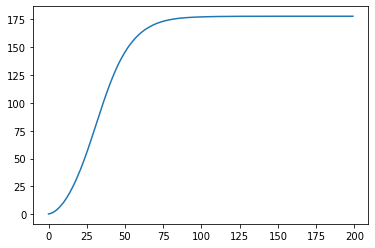

In [274]:
plt.plot(R/en_nubmer)

In [260]:
en_nubmer

500